
### Taller Práctico de Regresión Logística con la Base de Datos del Titanic

#### 1. **Ajuste de Modelos de Regresión Logística**
  - Cargar la base de datos del Titanic.
  - Realizar un análisis exploratorio de los datos.
  - Ajustar diferentes modelos de regresión logística variando las variables independientes.
  - Guardar los resultados de los ajustes para comparaciones futuras.

#### 2. **Interpretación de Log Odds, Odds y Cambios Marginales en Probabilidad**
  - Explicar cómo interpretar los log odds y los odds ratios resultantes de los modelos.
  - Utilizar las salidas de los modelos para calcular los cambios marginales en las probabilidades.


#### 3. **Métricas de Rendimiento de Modelos**
  - Explicar y calcular AUC, curva ROC, especificidad, sensitividad y F1 score para cada modelo.
  - Utilizar visualizaciones para comparar las curvas ROC de los distintos modelos.
  - Discusión sobre qué modelo funciona mejor y en qué circunstancias.

#### 4. **Bondad de Ajuste y Comparación de Modelos Jerárquicos**
  - Introducir conceptos de bondad de ajuste específicos para regresión logística.
  - Analizar cuál modelo ajusta mejor los datos y por qué.

#### 5. **Análisis de Residuos**
  - Identificar patrones en los residuos y discutir su significado.
  - Correlacionar los hallazgos del análisis de residuos con la calidad del ajuste del modelo.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB
None


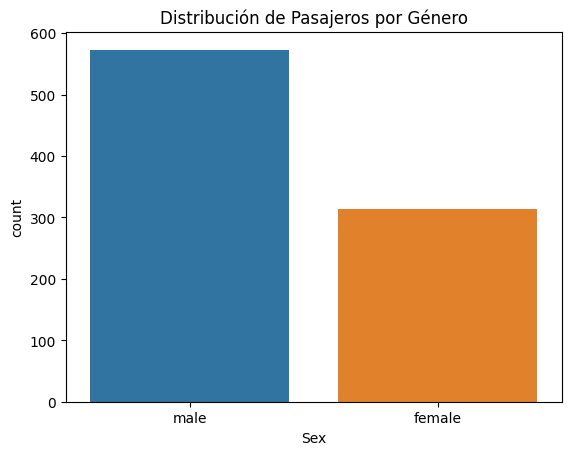

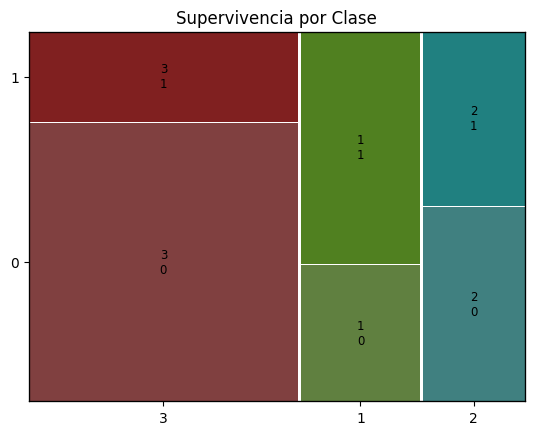

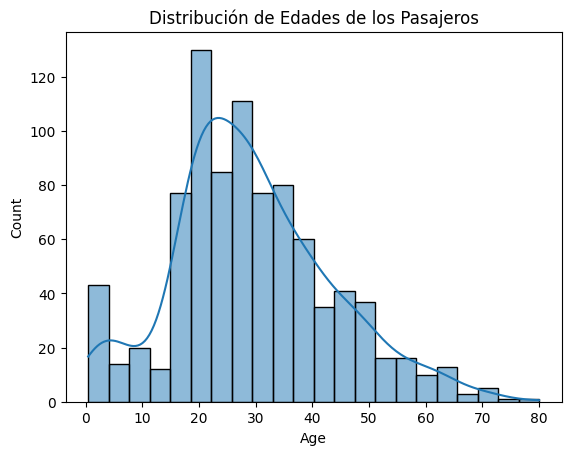

<ipython-input-7-87d56d0a5d34>:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_data.corr(), annot=True, cmap="coolwarm")


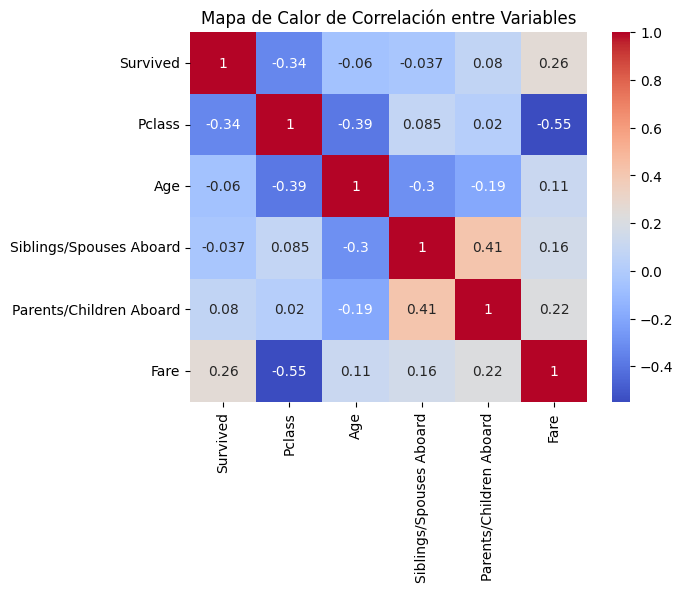

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Cargando el dataset del Titanic
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic_data = pd.read_csv(url)

# Análisis exploratorio básico
print(titanic_data.info())

# Visualizaciones para entender mejor los datos
# Distribución de pasajeros por género
sns.countplot(x='Sex', data=titanic_data)
plt.title("Distribución de Pasajeros por Género")
plt.show()

# Supervivencia por clase
mosaic(titanic_data, ['Pclass', 'Survived'])
plt.title("Supervivencia por Clase")
plt.show()

# Edades de los pasajeros
sns.histplot(titanic_data['Age'].dropna(), kde=True)
plt.title("Distribución de Edades de los Pasajeros")
plt.show()

# Correlación entre variables
sns.heatmap(titanic_data.corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de Calor de Correlación entre Variables")
plt.show()


In [8]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [9]:
import statsmodels.api as sm

# Preparación de los datos
# Convertir la variable 'Sex' a una variable dummy
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

# Variables independientes y dependiente
X = titanic_data[['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]
y = titanic_data['Survived']

# Añadir intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión logística
model = sm.Logit(y, X).fit()

# Mostrar un resumen del modelo
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.440210
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  887
Model:                          Logit   Df Residuals:                      880
Method:                           MLE   Df Model:                            6
Date:                Fri, 17 Nov 2023   Pseudo R-squ.:                  0.3397
Time:                        21:07:59   Log-Likelihood:                -390.47
converged:                       True   LL-Null:                       -591.38
Covariance Type:            nonrobust   LLR p-value:                 1.125e-83
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.5400      0.504      5.044      0.000       1.553   


- **Pclass**: El odds ratio de aproximadamente 0.31 para 'Pclass' sugiere que con cada incremento en la clase del pasajero (recordando que en este contexto un número más alto significa una clase más baja), las odds de supervivir disminuyen en un factor de 0.31, o lo que es lo mismo, hay una disminución de aproximadamente 69% en las odds de supervivencia por cada incremento en la clase del pasajero.

- **Sex**: Un odds ratio de aproximadamente 15.76 para 'Sex' indica que, suponiendo que 'Sex' esté codificado como 0 para hombres y 1 para mujeres, las mujeres tienen odds de sobrevivir 15.76 veces mayores que los hombres.

- **Age**: El odds ratio para 'Age' es aproximadamente 0.96, lo que implica que por cada año adicional en la edad de un pasajero, las odds de sobrevivir disminuyen en un 4% aproximadamente, asumiendo que todas las demás variables permanecen constantes.

- **Siblings/Spouses Aboard**: El odds ratio es aproximadamente 0.67, lo que sugiere que por cada hermano, cónyuge o pareja a bordo adicional, las odds de sobrevivir disminuyen en un 33%.

- **Parents/Children Aboard**: Con un odds ratio de aproximadamente 0.90, se indica que por cada padre o hijo adicional a bordo, las odds de sobrevivir disminuyen en un 10%.

- **Fare**: El odds ratio para 'Fare' es aproximadamente 1.00, lo que sugiere que por cada unidad adicional en la tarifa del pasaje, las odds de sobrevivir aumentan en un 0.27%, aunque este es un cambio muy pequeño y podría no ser significativo.


In [12]:
# Calculamos los efectos marginales en la media
marginal_effects = model.get_margeff()
print(marginal_effects.summary())


        Logit Marginal Effects       
Dep. Variable:               Survived
Method:                          dydx
At:                           overall
                             dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Pclass                     -0.1654      0.018     -9.038      0.000      -0.201      -0.130
Sex                         0.3872      0.015     26.438      0.000       0.359       0.416
Age                        -0.0061      0.001     -5.964      0.000      -0.008      -0.004
Siblings/Spouses Aboard    -0.0564      0.015     -3.715      0.000      -0.086      -0.027
Parents/Children Aboard    -0.0150      0.017     -0.900      0.368      -0.048       0.018
Fare                        0.0004      0.000      1.169      0.242      -0.000       0.001


Aquí está la interpretación de cada uno:

- **Pclass**: El efecto marginal es -0.1654, lo que significa que pasar a una clase más baja (por ejemplo, de primera a segunda clase) está asociado con una disminución del 16.54% en la probabilidad de supervivencia, manteniendo todo lo demás constante.

- **Sex**: El efecto marginal es 0.3872, lo que indica que ser mujer (suponiendo que 'Sex' está codificado como 0 para hombres y 1 para mujeres) está asociado con un aumento del 38.72% en la probabilidad de supervivencia, manteniendo todo lo demás constante.

- **Age**: El efecto marginal es -0.0061, lo que sugiere que cada año adicional de edad está asociado con una disminución del 0.61% en la probabilidad de supervivencia, manteniendo todo lo demás constante.

- **Siblings/Spouses Aboard**: El efecto marginal es -0.0564, indicando que cada hermano, cónyuge o pareja adicional a bordo está asociado con una disminución del 5.64% en la probabilidad de supervivencia, manteniendo todo lo demás constante.

- **Parents/Children Aboard**: El efecto marginal es -0.0150, lo que indica que cada padre o hijo adicional a bordo está asociado con una disminución del 1.50% en la probabilidad de supervivencia, manteniendo todo lo demás constante.

- **Fare**: El efecto marginal es 0.0004, lo que sugiere que cada unidad adicional en la tarifa del pasaje está asociada con un aumento del 0.04% en la probabilidad de supervivencia, manteniendo todo lo demás constante.


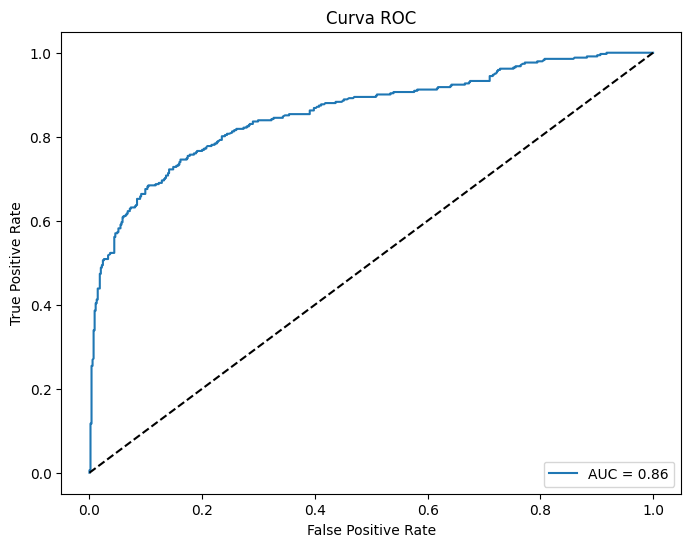

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       545
           1       0.77      0.70      0.73       342

    accuracy                           0.80       887
   macro avg       0.79      0.78      0.79       887
weighted avg       0.80      0.80      0.80       887

[[472  73]
 [103 239]]
Odds Ratios:
const                      12.679282
Pclass                      0.307999
Sex                        15.756963
Age                         0.957458
Siblings/Spouses Aboard     0.669094
Parents/Children Aboard     0.898970
Fare                        1.002790
dtype: float64


In [13]:
import numpy as np

from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

# Calcular odds ratios
odds_ratios = np.exp(model.params)

# Predecir las probabilidades
pred_prob = model.predict(X)

# Calcular AUC y ROC
fpr, tpr, thresholds = roc_curve(y, pred_prob)
auc = roc_auc_score(y, pred_prob)

# Visualizar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Reporte de clasificación y matriz de confusión
print(classification_report(y, pred_prob.round()))
print(confusion_matrix(y, pred_prob.round()))

# Mostrar odds ratios
print("Odds Ratios:")
print(odds_ratios)

In [16]:
# Imprimir las estadísticas de bondad de ajuste
print('Log-Likelihood:', model.llf)
print('AIC:', model.aic)
print('BIC:', model.bic)

# Para el Pseudo R-cuadrado, puedes obtenerlo desde el resumen del modelo
print('Pseudo R-squared:', model.prsquared)



Log-Likelihood: -390.465964754707
AIC: 794.931929509414
BIC: 828.446844385581
Pseudo R-squared: 0.3397431705472058


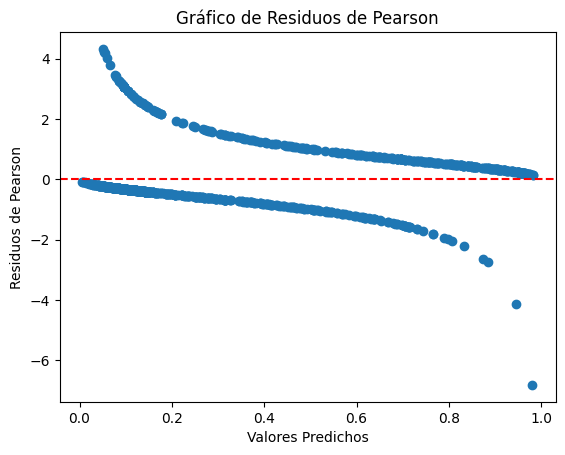

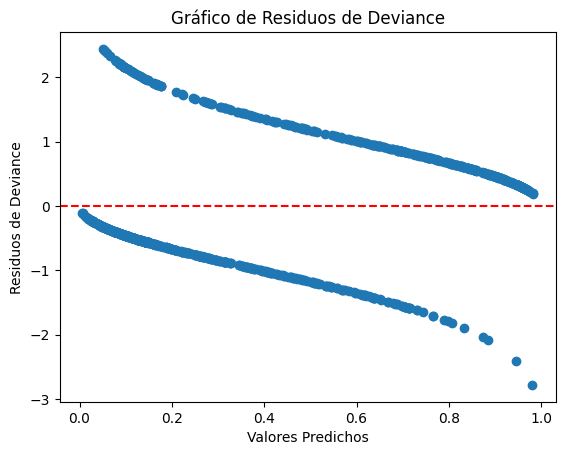

In [18]:

# Residuos de Pearson
residuos_pearson = model.resid_pearson

# Residuos de Deviance
residuos_deviance = model.resid_dev

# Podemos visualizar los residuos para identificar patrones o valores atípicos
import matplotlib.pyplot as plt

# Gráfico de residuos de Pearson
plt.scatter(model.predict(X), residuos_pearson)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos de Pearson')
plt.title('Gráfico de Residuos de Pearson')
plt.show()

# Gráfico de residuos de Deviance
plt.scatter(model.predict(X), residuos_deviance)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos de Deviance')
plt.title('Gráfico de Residuos de Deviance')
plt.show()


<ipython-input-19-b1362a5fc615>:13: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(cooks_d_values, use_line_collection=True)


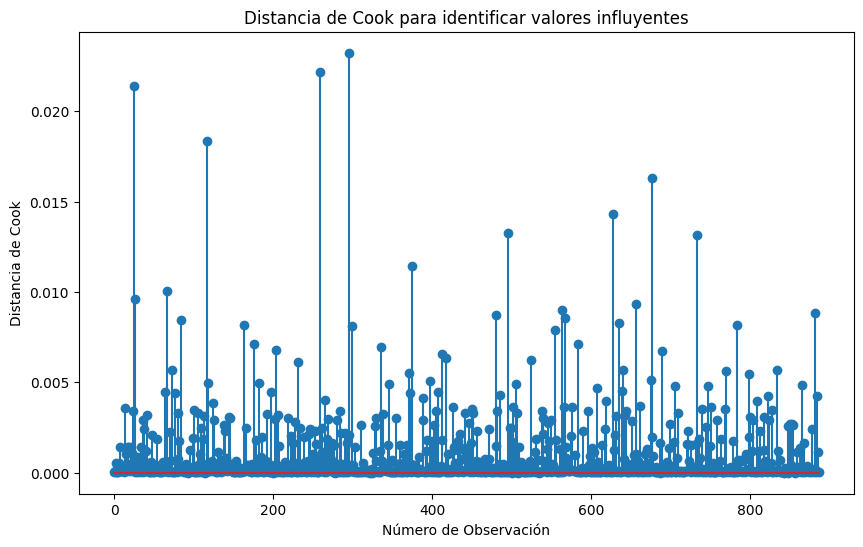

In [19]:
# Calculamos las medidas de influencia
influence = model.get_influence()

# Obtenemos la distancia de Cook, que es parte de las medidas de influencia
cooks_d = influence.cooks_distance

# El objeto cooks_d contiene dos elementos: los valores de la distancia de Cook y los p-values asociados.
# Solo necesitamos los valores para la visualización.
cooks_d_values = cooks_d[0]

# Visualizamos la distancia de Cook
plt.figure(figsize=(10,6))
plt.stem(cooks_d_values, use_line_collection=True)
plt.title('Distancia de Cook para identificar valores influyentes')
plt.xlabel('Número de Observación')
plt.ylabel('Distancia de Cook')
plt.show()

El siguiente problema fue extraído de una competencia de Kaggle con un premio de USD 5,000 dólares que fue ganado por un equipo que utilizo un modelo de regresión logística dentro de su proceso de solución.

*Give Me Some Credit (https://www.kaggle.com/c/GiveMeSomeCredit/data): Improve on the state of the art in credit scoring by predicting the probability that somebody will experience financial distress in the next two years. Use the training data of the cs-training.csv file.*

Estime dos modelos con (i) todas las variables disponibles y (ii) solo con el ingreso y la edad.

1. Seleccione el mejor modelo utilizando (i) el criterio de información de Akaike y (ii) el AUC.

2. Para cada modelo establezca el threshold en el valor que maximice el F1-score definido por:

$$F1_{score}=2*(sensibilidad*especificidad)/(sensibilidad+especificidad)$$

3. Construya las matrices de confusión con los threshold ya calibrados y para cada par de modelos seleccione el de mejor desempeño en el accuracy.

4. Realice las pruebas de significancia global de los modelos con la prueba de ratio de verosimilitud. Seleccione el modelo que tenga el menor p-valor asociado. Si no es posible concluir con el p-valor seleccione el modelo con el mayor estadístico.

5. En el modelo seleccionado, con un prueba de Wald, determine cuáles variables son significativas al 1% e interprete sus efectos en:

	- Log-odds
	- Odds para la primera observacion
	- Probabilidad para la primera observación
	- Odds-Ratio
	- Efectos marginales promedio
